Definitions and imports

In [248]:
import math
import pandas
import matplotlib.pyplot as plt
import numpy
import sklearn.decomposition as sde
import sklearn.datasets as sd

class k_nn:
    neighbors=1
    KDtree=False
    X=[]
    y=[]
    prediction=[]
    def __init__(self,n_neighbors=1,use_KDtree=False):
        self.neighbors=n_neighbors
        self.KDtree=use_KDtree
    def fit(self,X,y):
        self.X=X
        self.y=y
    def predict(self,X):
        if self.KDtree:
            _, nearestIndexs = self.kd_tree.query(X, k=self.n_neighbors)
        else:
            distance=[]
            for point in self.X:
                distance.append(math.dist(X,point))
            smallestDistance=distance.copy()
            smallestDistance.sort()
            smallestDistance=smallestDistance[:self.neighbors]
            nearestIndexs=[]
            for value in smallestDistance:
                nearestIndexs.append(distance.index(value))
            sum=0
        for index in nearestIndexs:
            sum+=self.y[index]
        sum=sum/self.neighbors
        return sum

    def regression(self,X):
        d=[]
        for xP in self.X[:,0]:
            d.append(math.fabs(X-xP))
        smallestDistance = d.copy()
        smallestDistance.sort()
        smallestDistance = smallestDistance[:self.neighbors]
        nearestIndexs = []
        for value in smallestDistance:
            nearestIndexs.append(d.index(value))
        sum = 0
        for index in nearestIndexs:
            sum += self.y[index]
        sum1 = sum / self.neighbors
        return sum1

    def scoreR(self, X, y):
        a=0
        for i in range(X.shape[0]):
            a+=(X[i]-y[i])**2
        return a/X.shape[0]

    def scoreC(self, X, y):
        a=0
        for i in range(X.shape[0]):
            if X[i]==y[i]:
                a+=1
        return a/X.shape[0]

Zad 1

In [249]:
X,group = sd.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=0
)
print(X)
print(group)

[[-7.66054695e-01  1.83324682e-01]
 [-9.20383253e-01 -7.23168038e-02]
 [-9.86585088e-01 -2.86920000e-01]
 [ 1.70910242e+00 -1.10453952e+00]
 [ 1.98764670e+00  1.77624479e+00]
 [ 3.86274219e+00  2.63325914e+00]
 [-1.12836011e+00 -4.22761581e-01]
 [-1.10074198e+00 -2.56042975e+00]
 [-1.53716448e+00  1.10502647e+00]
 [-3.23726922e-01  5.56269743e-01]
 [-1.28532883e+00 -1.30819171e+00]
 [ 3.35973253e+00 -1.79506345e+00]
 [-1.27034986e+00  1.26780440e+00]
 [-7.10233633e-01 -1.13058206e+00]
 [-1.12933108e+00  6.87661760e-01]
 [ 2.48206729e-01 -5.09792713e-01]
 [-2.47263494e+00 -4.86612462e-01]
 [-1.11573423e+00  1.43370121e+00]
 [-1.21414740e+00  1.97698901e+00]
 [-1.25860859e+00 -1.82896522e-01]
 [-5.35834091e-01  1.10698637e+00]
 [ 9.23281451e-01 -1.30813451e+00]
 [ 2.02751248e+00 -4.03257104e-01]
 [ 2.18718140e+00  2.03196825e+00]
 [ 5.12814562e-01  4.32994532e-01]
 [-2.81180710e+00 -3.45538051e-01]
 [ 3.13380666e-01  1.12073484e+00]
 [ 2.72990606e-01 -3.21105367e-01]
 [-1.18986266e+00  4

Zad 2

In [250]:
a=k_nn(n_neighbors=2,use_KDtree=False)
a.fit(X,group)

Zad 3

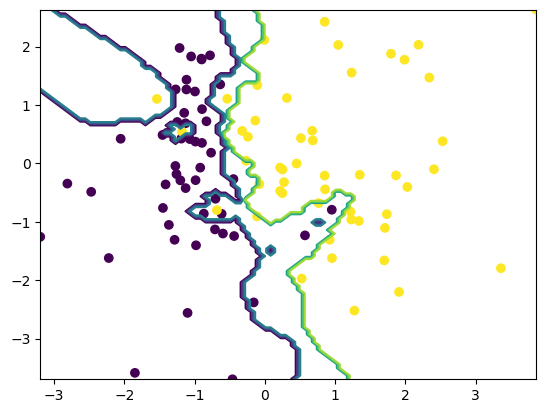

In [251]:
x = numpy.linspace(X[:,0].min(), X[:,0].max(), 100)
y = numpy.linspace(X[:,1].min(), X[:,1].max(), 100)

meshX,meshY=numpy.meshgrid(x,y)
meshPrediction=numpy.zeros(meshX.shape)
for yCor in range(meshY.shape[0]):
    for xCor in range(meshX.shape[1]):
        temp=numpy.array([meshX[xCor][yCor],meshY[xCor][yCor]])
        meshPrediction[xCor][yCor]=a.predict(temp)
fig,ax=plt.subplots(1,1)
ax.contour(meshX, meshY, meshPrediction)

plt.scatter(X[:,0],X[:,1],c=group)
plt.show()

Zad 4

In [252]:
iris = sd.load_iris()
X_iris, y_iris = iris.data, iris.target
knn_iris=k_nn(n_neighbors=3)
knn_iris.fit(X_iris, y_iris)
pca = sde.PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
x_min, x_max = X_pca[:, 0].min() , X_pca[:, 0].max()
y_min, y_max = X_pca[:, 1].min() , X_pca[:, 1].max()

Zad 5

a

In [253]:
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, 0.1), numpy.arange(y_min, y_max, 0.1))
X_grid = numpy.c_[xx.ravel(), yy.ravel()]

b

In [254]:
X_grid = numpy.c_[xx.ravel(), yy.ravel()]
X_original = pca.inverse_transform(X_grid)

c

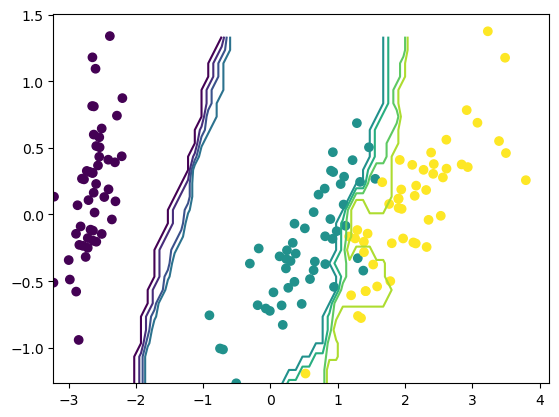

In [255]:
T=[]
for point in X_original:
    T.append(knn_iris.predict(point))
Z=numpy.asarray(T)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_iris)
plt.show()

Zad 6

In [256]:
iris = sd.load_iris()
X_iris, y_iris = iris.data, iris.target
sum=0
results=[]
for k in range(2,10):
    i=0
    for index in range(0,X_iris.shape[0]):
        iris = sd.load_iris()
        Xi, yi = iris.data, iris.target
        testData=Xi[index,:]
        numpy.delete(Xi,index)
        testTarget=yi[index]
        numpy.delete(yi,index)
        temp=k_nn(n_neighbors=k)
        temp.fit(Xi,yi)
        predictedValue=temp.predict(testData)
        i+=1
        if predictedValue==testTarget:
            sum+=1
    sum/=i
    results.append(sum)
print(results)

[0.96, 0.9530666666666667, 0.9330204444444444, 0.9062201362962964, 0.8660414675753086, 0.8657736097838354, 0.8457718240652257, 0.8389718121604348]


7

In [257]:
X,group = sd.make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    random_state=0
)
print(X)
print(group)


[[-7.66054695e-01  1.83324682e-01]
 [-9.20383253e-01 -7.23168038e-02]
 [-9.86585088e-01 -2.86920000e-01]
 [ 1.70910242e+00 -1.10453952e+00]
 [ 1.98764670e+00  1.77624479e+00]
 [ 3.86274219e+00  2.63325914e+00]
 [-1.12836011e+00 -4.22761581e-01]
 [-1.10074198e+00 -2.56042975e+00]
 [-1.53716448e+00  1.10502647e+00]
 [-3.23726922e-01  5.56269743e-01]
 [-1.28532883e+00 -1.30819171e+00]
 [ 3.35973253e+00 -1.79506345e+00]
 [-1.27034986e+00  1.26780440e+00]
 [-7.10233633e-01 -1.13058206e+00]
 [-1.12933108e+00  6.87661760e-01]
 [ 2.48206729e-01 -5.09792713e-01]
 [-2.47263494e+00 -4.86612462e-01]
 [-1.11573423e+00  1.43370121e+00]
 [-1.21414740e+00  1.97698901e+00]
 [-1.25860859e+00 -1.82896522e-01]
 [-5.35834091e-01  1.10698637e+00]
 [ 9.23281451e-01 -1.30813451e+00]
 [ 2.02751248e+00 -4.03257104e-01]
 [ 2.18718140e+00  2.03196825e+00]
 [ 5.12814562e-01  4.32994532e-01]
 [-2.81180710e+00 -3.45538051e-01]
 [ 3.13380666e-01  1.12073484e+00]
 [ 2.72990606e-01 -3.21105367e-01]
 [-1.18986266e+00  4

In [258]:
a=k_nn(n_neighbors=2,use_KDtree=False)
a.fit(X,group)

In [259]:
a=k_nn(n_neighbors=5,use_KDtree=False)
a.fit(X,group)

In [260]:
a=k_nn(n_neighbors=2,use_KDtree=True)
a.fit(X,group)

In [261]:
a=k_nn(n_neighbors=5,use_KDtree=True)
a.fit(X,group)

regresja

1

In [262]:
X, y = sd.make_regression(n_samples=100, n_features=1, noise=20, random_state=0)
print(X)
print(y)

[[-0.35955316]
 [ 0.97663904]
 [ 0.40234164]
 [-0.81314628]
 [-0.88778575]
 [ 0.44386323]
 [-0.97727788]
 [ 0.42833187]
 [ 0.20827498]
 [-0.31155253]
 [-0.51080514]
 [ 0.12691209]
 [-1.53624369]
 [-0.40178094]
 [ 0.6536186 ]
 [ 1.17877957]
 [-0.17992484]
 [ 1.78587049]
 [ 1.45427351]
 [-0.68481009]
 [ 0.97873798]
 [ 1.89588918]
 [-0.4380743 ]
 [ 0.3130677 ]
 [ 0.76103773]
 [ 0.77749036]
 [ 1.9507754 ]
 [ 0.33367433]
 [-0.34791215]
 [ 1.53277921]
 [-0.89546656]
 [-0.57884966]
 [-1.04855297]
 [ 0.37816252]
 [ 0.01050002]
 [ 0.46278226]
 [ 0.14404357]
 [-0.40317695]
 [ 0.0519454 ]
 [-1.25279536]
 [ 1.05445173]
 [ 0.40015721]
 [-1.70627019]
 [ 2.2408932 ]
 [ 0.17742614]
 [-0.20515826]
 [ 1.23029068]
 [-0.85409574]
 [ 1.76405235]
 [ 0.4105985 ]
 [-0.90729836]
 [-1.42001794]
 [ 0.46566244]
 [ 0.90082649]
 [ 1.13940068]
 [ 0.40198936]
 [ 0.3869025 ]
 [-1.7262826 ]
 [ 1.46935877]
 [-0.18718385]
 [-0.87079715]
 [ 0.3024719 ]
 [ 1.20237985]
 [-1.98079647]
 [-2.55298982]
 [-1.45436567]
 [-0.02818

2

In [267]:
knn = k_nn(5)
knn.fit(X, y)
temp=[]
temp2=[]
temp3 = numpy.linspace(X[:,0].min(), X[:,0].max(), 100)
for point in temp3:
    xP=knn.regression(point)
    temp.append(xP)
    temp2.append(point)
print(temp2)
print(temp)

[-2.5529898158340787, -2.5042752255328495, -2.4555606352316204, -2.4068460449303912, -2.358131454629162, -2.309416864327933, -2.2607022740267038, -2.2119876837254746, -2.1632730934242455, -2.1145585031230163, -2.065843912821787, -2.017129322520558, -1.9684147322193288, -1.9197001419180997, -1.8709855516168705, -1.8222709613156414, -1.7735563710144122, -1.724841780713183, -1.676127190411954, -1.6274126001107247, -1.5786980098094956, -1.5299834195082662, -1.481268829207037, -1.432554238905808, -1.3838396486045788, -1.3351250583033496, -1.2864104680021204, -1.2376958777008913, -1.1889812873996621, -1.140266697098433, -1.0915521067972038, -1.0428375164959747, -0.9941229261947455, -0.9454083358935164, -0.8966937455922872, -0.847979155291058, -0.7992645649898289, -0.7505499746885997, -0.7018353843873706, -0.6531207940861414, -0.6044062037849123, -0.5556916134836831, -0.5069770231824537, -0.4582624328812246, -0.40954784257999544, -0.3608332522787663, -0.3121186619775371, -0.26340407167630797,

3

316.2398613930342


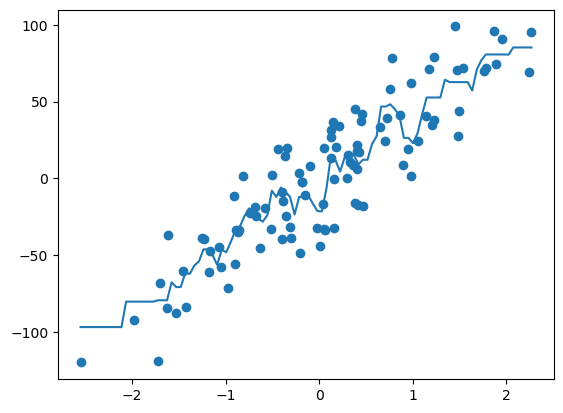

In [269]:
error=[]
for i in range(X.shape[0]):
    if(X[i] in temp2):
        index=temp2.index(X[i])
        error.append((y[i]-temp[index])**2)
print(numpy.average(error))
plt.scatter(X,y)
plt.plot(temp2,temp)
plt.show()

4

In [265]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pandas.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = numpy.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

5

In [279]:
results = []
for k in range(2,10):
    scores = []
    for i in range(10):
        model = k_nn(n_neighbors=k, use_KDtree=True)
        test_indices = range(i, len(X), 10)
        train_indices = [j for j in range(len(X)) if j not in test_indices]
        X_train, y_train = X[train_indices], y[train_indices]
        X_test, y_test = X[test_indices], y[test_indices]
        model.fit(X_train, y_train)
        temp=[]
        for index in range(X_test.shape[0]):
            xP=knn.regression(X_test[index])
            temp.append((xP-y_train[index])**2)
        scores.append(numpy.average(temp))
    mean_score = numpy.mean(scores)
    results.append( mean_score)
data = {'Ilosc sasiadow': [2,3,4,5,6,7,8,9],
        'blad': results}
df=pandas.DataFrame(data)
print(df)

   Ilosc sasiadow         blad
0               2  2945.026865
1               3  2945.026865
2               4  2945.026865
3               5  2945.026865
4               6  2945.026865
5               7  2945.026865
6               8  2945.026865
7               9  2945.026865
